# Import Packages

In [1]:
import numpy as np
import pandas as pd
from iso_mix import rast
import matplotlib.pyplot as plt

# Isotherm models

In [2]:
R_gas = 8.3145
Arrh =  lambda dH,T,Tref: np.exp(abs(dH/R_gas)*(1/T - 1/Tref))
def Lang(P,T,par,dH,Tref):
    bP = par[1]*P*Arrh(dH,T,Tref)
    numer = par[0]*bP
    denom = 1 + bP
    return numer/denom
lang1 = lambda P,T: Lang(P,T,[3, 0.1],10, 300)
lang2 = lambda P,T: Lang(P,T,[1, 0.5],20, 300)
P_partial = np.array([2,0.1])
Lambda_test = np.array([[1,0.8],[0.8,1]])
C_test = 1
rast_test_res = rast([lang1,lang2],P_partial,300,Lambda_test,C_test)
print(rast_test_res)
#print(rast_test_res[0])
#print(rast_test_res[1])

[0.48987604 0.02008235]


# For fixed (P,T) change gas composition

In [3]:
P_fix = 20
T_fix = 300
y_fix = np.array([0.5,0.5])
Lambda_fix = np.array([[1,1],[1,1],])
C_fix = 1
N = 30
y_var = np.linspace(0,1-1/N,N)
y_arr = np.transpose(np.array([y_var, 1-y_var]))
iso_list = [lang1,lang2]
q_test = rast(iso_list, P_fix*y_fix, T_fix, Lambda_fix,C_fix)
print(q_test)
q1_res_tmp = []
q2_res_tmp = []

for yy in y_arr:
    #print(yy)
    q_tmp = rast(iso_list, P_fix*yy, T_fix, Lambda_fix, C_fix)
    q1_res_tmp.append(q_tmp[0])
    q2_res_tmp.append(q_tmp[1])
    

[0.45453927 0.45455164]


C:\Users\SebyG\Documents\GitHub\RAST-v01\iso_mix.py:186: RuntimeWarning: invalid value encountered in true_divide
  q_P = iso(P_ran, T)/P_ran
C:\Users\SebyG\Documents\GitHub\RAST-v01\iso_mix.py:141: RuntimeWarning: invalid value encountered in true_divide
  q_ov_P = iso(P_ran)/P_ran
C:\Users\SebyG\Documents\GitHub\RAST-v01\iso_mix.py:264: RuntimeWarning: invalid value encountered in true_divide
  q_tot = 1/(np.sum(x_re/q_pure))


# Graph of the above test

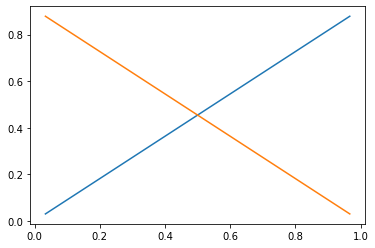

In [4]:
plt.plot(y_var, q1_res_tmp)
plt.plot(y_var, q2_res_tmp)

# Test for varying $\Lambda_{1,2}$

In [5]:
N_lam = 9
Lambd_var = np.linspace(0.2,1.8,N_lam)
q1_res_lamb = []
q2_res_lamb = []
Lambda_fix = np.array([[1.,1.,],[1.,1.]])
for La in Lambd_var:
    Lambda_fix[0,1] = La
    print(La)
    #Lambda_fix[0,1] = La
    #Lambda_fix[1,0] = La
    q1_res_tmp = []
    q2_res_tmp = []
    for yy in y_arr:
        #print(yy)
        q_tmp = rast(iso_list, P_fix*yy, T_fix, Lambda_fix, C_fix)
        q1_res_tmp.append(q_tmp[0])
        q2_res_tmp.append(q_tmp[1])
    q1_res_lamb.append(np.array(q1_res_tmp))
    q2_res_lamb.append(np.array(q2_res_tmp))
    

0.2


C:\Users\SebyG\Documents\GitHub\RAST-v01\iso_mix.py:186: RuntimeWarning: invalid value encountered in true_divide
  q_P = iso(P_ran, T)/P_ran
C:\Users\SebyG\Documents\GitHub\RAST-v01\iso_mix.py:141: RuntimeWarning: invalid value encountered in true_divide
  q_ov_P = iso(P_ran)/P_ran
C:\Users\SebyG\Documents\GitHub\RAST-v01\iso_mix.py:264: RuntimeWarning: invalid value encountered in true_divide
  q_tot = 1/(np.sum(x_re/q_pure))


0.4
0.6000000000000001
0.8
1.0
1.2
1.4000000000000001
1.6
1.8


Text(0, 0.5, 'uptake of component 1 (mol/kg)')

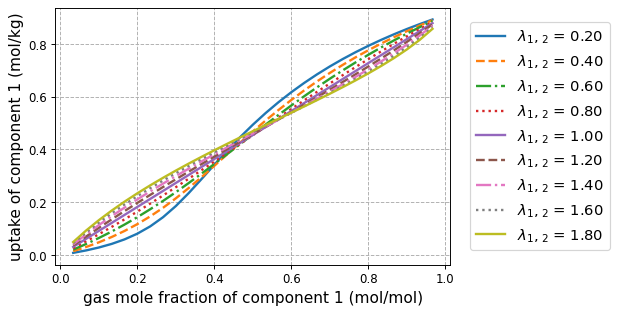

In [13]:
fig,ax = plt.subplots(dpi = 85)
lstyle = ['--','-.',':',]*4
for ii in range(N_lam):
    if La[ii] == 1:
        ax.plot(y_var, q1_res_lamb[ii], lw = 2,
        linestyle=lstyle[ii], label = '$\lambda_1$$,_2$ = {0:4.2f} = (IAST)'.format(Lambd_var[ii]))
    else:
        ax.plot(y_var, q1_res_lamb[ii], lw = 2,
        linestyle=lstyle[ii], label = '$\lambda_1$$,_2$ = {0:4.2f}'.format(Lambd_var[ii]))
plt.grid(linestyle = '--')
plt.legend(fontsize = 12.5, loc = 'center left', bbox_to_anchor = [1.03,0.5])
ax.set_xlabel('gas mole fraction of component 1 (mol/mol)',fontsize = 13)
ax.set_ylabel('uptake of component 1 (mol/kg)',fontsize = 13)

#ax.set_xlim(0.05,0.95)
#ax.set_ylim(0.3,0.62)


Text(0, 0.5, 'uptake of component 2 (mol/kg)')

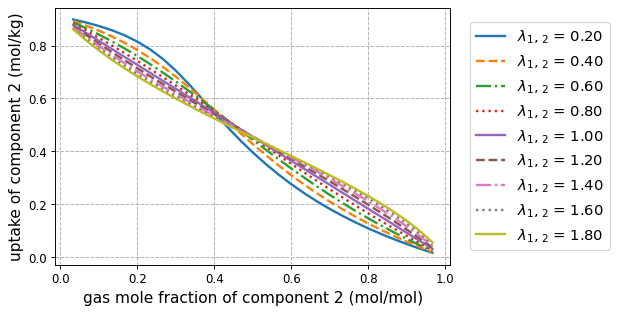

In [17]:
fig,ax = plt.subplots(dpi = 85)
lstyle = ['--','-.',':',]*4
for ii in range(N_lam):
    ax.plot(y_var, q2_res_lamb[ii], lw = 2,
    linestyle=lstyle[ii], label = '$\lambda_1$$,_2$ = {0:4.2f}'.format(Lambd_var[ii]))
plt.grid(linestyle = '--')
plt.legend(fontsize = 12.5, loc = 'center left', bbox_to_anchor = [1.03,0.5])
ax.set_xlabel('gas mole fraction of component 2 (mol/mol)',fontsize = 13)
ax.set_ylabel('uptake of component 2 (mol/kg)',fontsize = 13)

#ax.set_xlim(0.05,0.95)
#ax.set_ylim(0.35,0.75)


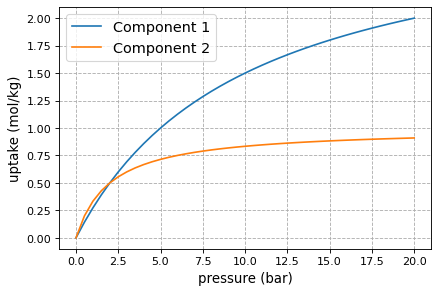

In [59]:
# PURE Isotherms
P_ran = np.linspace(0,20,41)
q1_pure = lang1(P_ran,300)
q2_pure = lang2(P_ran,300)

# Graph
plt.figure(dpi = 80)
plt.plot(P_ran, q1_pure)
plt.plot(P_ran, q2_pure)
plt.grid(linestyle = '--')
plt.xlabel('pressure (bar)', fontsize = 12)
plt.ylabel('uptake (mol/kg)', fontsize = 12)

plt.legend(['Component 1','Component 2'], fontsize = 13)

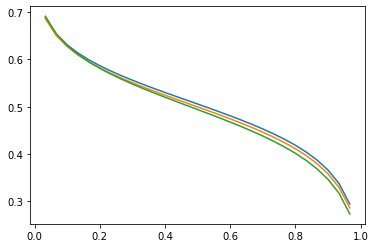

In [47]:
plt.plot(y_var, q2_res_lamb[0])
plt.plot(y_var, q2_res_lamb[1])
plt.plot(y_var, q2_res_lamb[2])